# Using Logistic Regression Classifier

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Datset

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

### Head, Info, Describe to get a brief about the Data

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Visualizing the Data

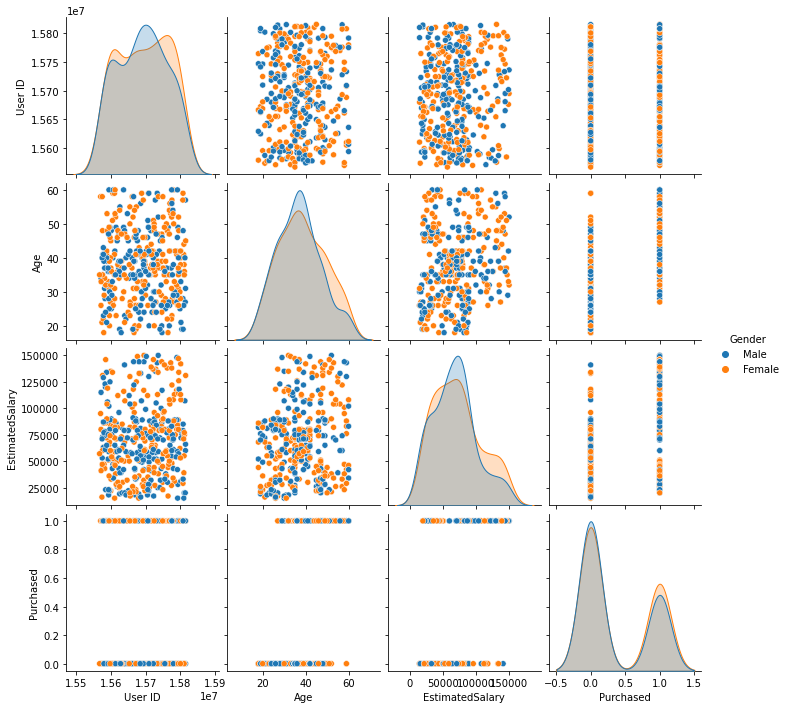

In [6]:
sns.pairplot(data=df,hue='Gender')

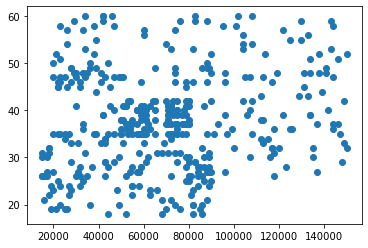

In [7]:
plt.scatter(df['EstimatedSalary'],df['Age'])

<AxesSubplot:ylabel='Frequency'>

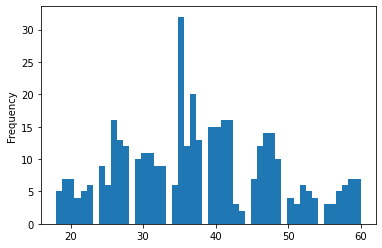

In [8]:
df['Age'].plot.hist(bins=50)

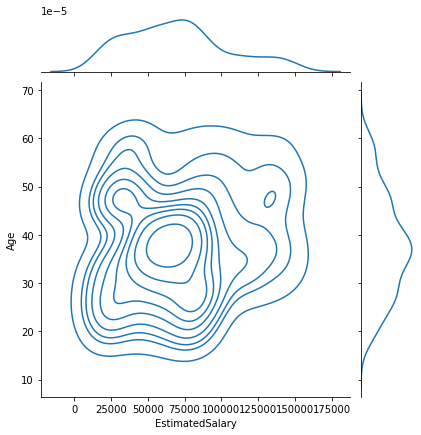

In [9]:
sns.jointplot(x='EstimatedSalary',y='Age',data=df,kind='kde')

### Spliting the Data

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
X = df.iloc[:,2:-1].values
y = df.iloc[:,-1].values

### Importing Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [13]:
X_train

array([[    37,  80000],
       [    47, 144000],
       [    20,  82000],
       [    26,  35000],
       [    33,  51000],
       [    27, 137000],
       [    45,  79000],
       [    21,  16000],
       [    36, 144000],
       [    46,  96000],
       [    25,  80000],
       [    26,  80000],
       [    45, 131000],
       [    22,  81000],
       [    41,  52000],
       [    42,  53000],
       [    28,  87000],
       [    41,  51000],
       [    39,  42000],
       [    42, 108000],
       [    27,  20000],
       [    41,  79000],
       [    58, 101000],
       [    48, 134000],
       [    28,  55000],
       [    40,  57000],
       [    52, 150000],
       [    35,  61000],
       [    26,  30000],
       [    42,  73000],
       [    40,  65000],
       [    31,  18000],
       [    37,  78000],
       [    46,  88000],
       [    52,  38000],
       [    28,  44000],
       [    59,  42000],
       [    32,  18000],
       [    35,  58000],
       [    35,  55000],


In [14]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

### Applying Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_test

array([[-1.12560115,  0.0676494 ],
       [ 0.12164031,  0.0379134 ],
       [ 0.50540691,  1.88154533],
       [-0.6458929 ,  0.0379134 ],
       [-0.35806795, -0.79469457],
       [ 1.08105681,  0.1271214 ],
       [-1.60530941, -0.0512946 ],
       [ 0.21758196, -0.31891859],
       [-0.93371785, -1.12179056],
       [-1.89313436,  0.48395338],
       [-0.07024299,  2.20864132],
       [ 1.46482342,  1.01920136],
       [-0.35806795,  1.34629735],
       [-0.74183455,  0.57316138],
       [-0.07024299,  0.30553739],
       [-0.4540096 , -0.79469457],
       [-0.07024299,  2.00048933],
       [ 0.79323186, -0.31891859],
       [ 0.02569866,  0.0379134 ],
       [ 0.98511516, -1.21099856],
       [ 0.12164031,  1.91128133],
       [ 0.98511516,  1.82207333],
       [ 0.40946526, -0.17023859],
       [-0.07024299,  0.21632939],
       [ 0.12164031,  0.21632939],
       [-1.79719271, -1.44888655],
       [-1.79719271, -1.32994255],
       [ 1.94453167, -0.67575057],
       [ 0.88917351,

### Training the Logistic Regression Classifier Model with Training Data

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

### Predicting the Logistic Regression Classifier Model with Testing Data

In [18]:
pred=lr.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
print(confusion_matrix(y_test,pred))

[[72  8]
 [13 27]]


In [21]:
print(accuracy_score(y_test,pred))

0.825


### Logistic Regression Classifier Model predicted with an accuracy of 82.5%